# Context
Machine Learning with R by Brett Lantz is a book that provides an introduction to machine learning using R. As far as I can tell, Packt Publishing does not make its datasets available online unless you buy the book and create a user account which can be a problem if you are checking the book out from the library or borrowing the book from a friend. All of these datasets are in the public domain but simply needed some cleaning up and recoding to match the format in the book.


Columns

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

# 001 Importing the Dependencies

In [51]:
# Import pandas package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# 002 Data Collection and Processing

In [53]:
# Loading data to pandas DataFrame
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
# loading csv File
file_path = '/content/drive/MyDrive/Colab Notebooks/ML_Practice_Projects/Project 11 Medical Insurance Cost Prediction/insurance.csv'
insurance_data=pd.read_csv(file_path)
pd.set_option('display.max_columns',None)

In [55]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [56]:
insurance_data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [57]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features
1.   sex 
2.   smoker
3.   region


In [58]:
insurance_data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

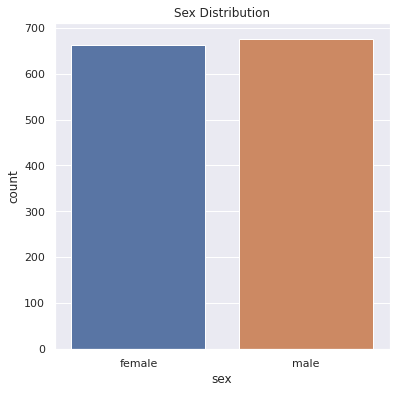

In [59]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_data)
plt.title('Sex Distribution')
plt.show()


In [60]:
insurance_data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

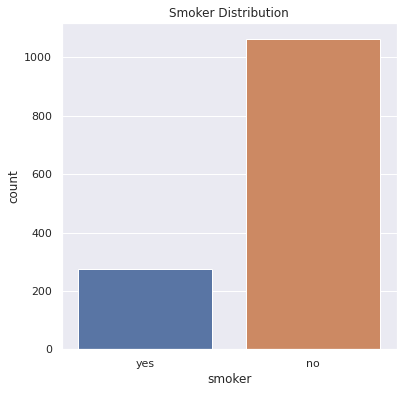

In [61]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_data)
plt.title('Smoker Distribution')
plt.show()

In [62]:
insurance_data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

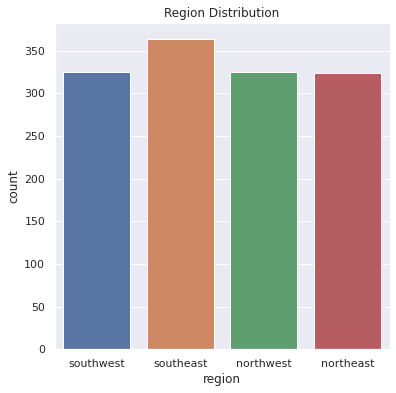

In [63]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_data)
plt.title('Region Distribution')
plt.show()

In [64]:
insurance_data.shape

(1338, 7)

In [65]:
insurance_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [66]:
insurance_data.isnull().value_counts()

age    sex    bmi    children  smoker  region  charges
False  False  False  False     False   False   False      1338
dtype: int64

In [67]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [68]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f08be9fe4c0>,
      dtype=object)

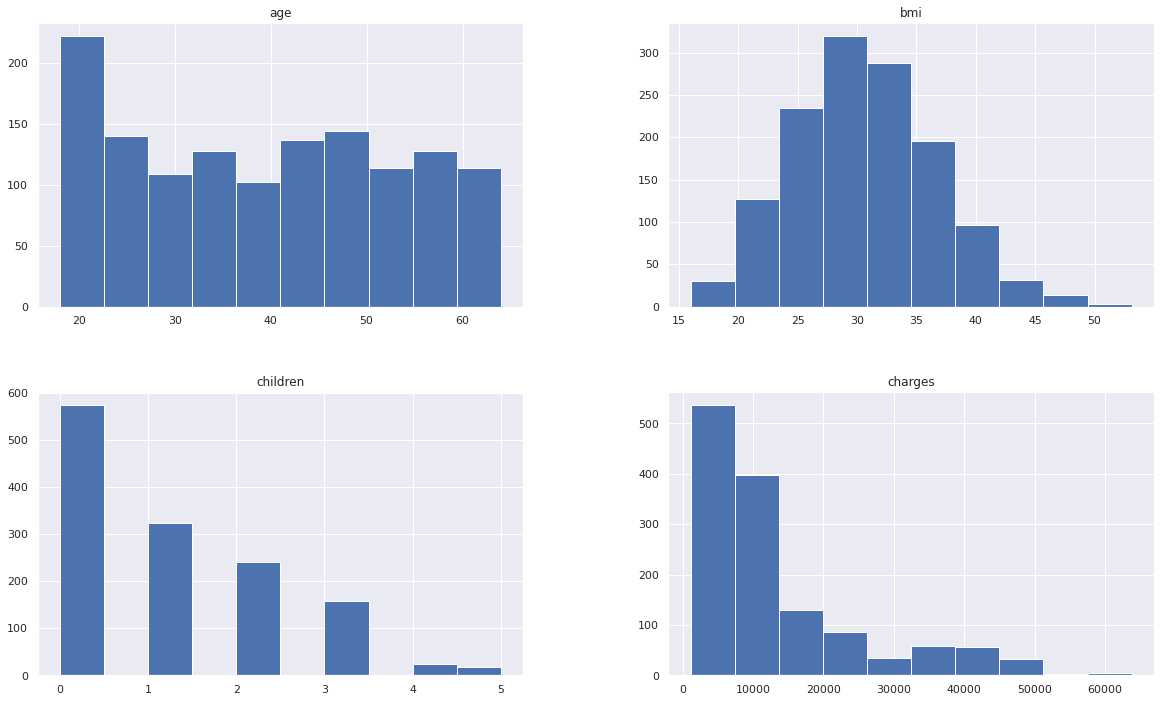

In [69]:
insurance_data.hist(figsize=(20,12))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


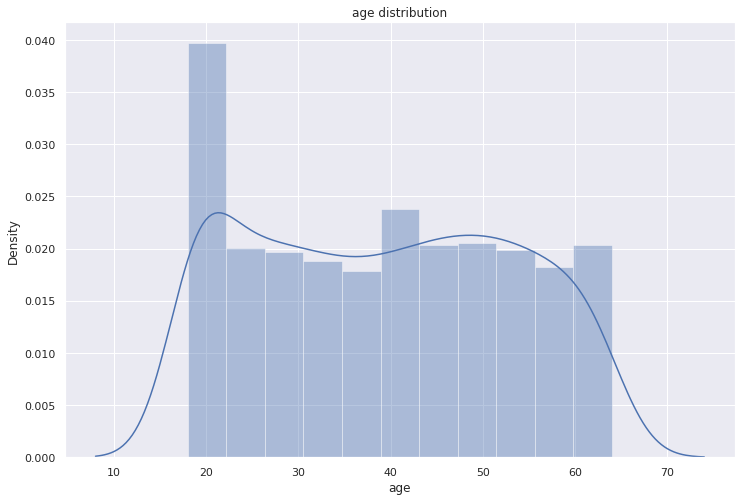

In [70]:
# distribution of a age value
plt.figure(figsize=(12,8))
sns.distplot(insurance_data['age'])
plt.title('age distribution')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


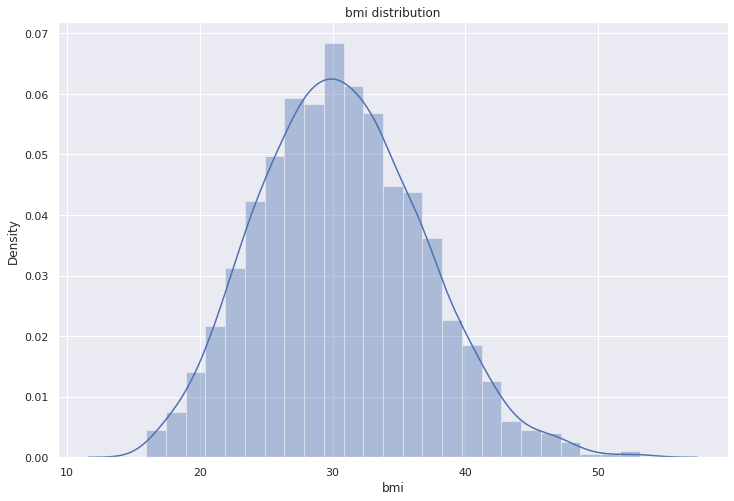

In [71]:
# distribution of a bmi value
plt.figure(figsize=(12,8))
sns.distplot(insurance_data['bmi'])
plt.title('bmi distribution')
plt.show()

In [72]:
# Normal BMI Range --->>>18.5 to 24.9

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


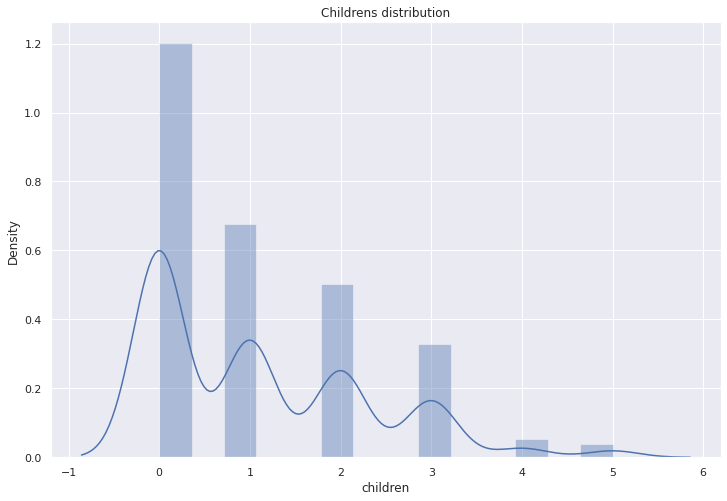

In [73]:
# distribution of a children value
plt.figure(figsize=(12,8))
sns.distplot(insurance_data['children'])
plt.title('Childrens distribution')
plt.show()

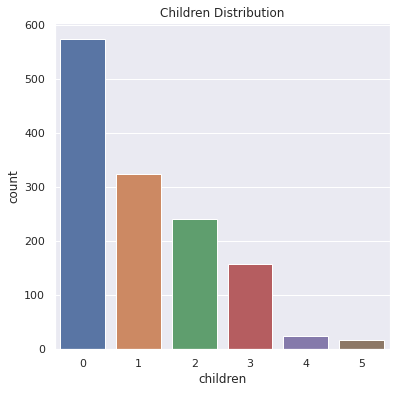

In [74]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_data)
plt.title('Children Distribution')
plt.show()

In [75]:
insurance_data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


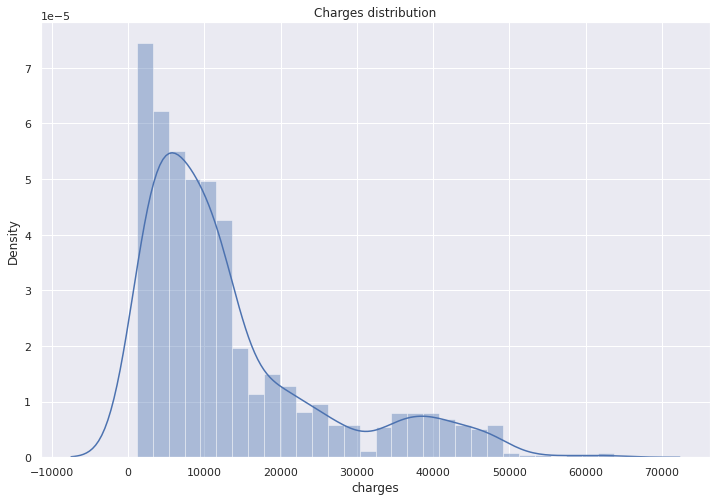

In [76]:
# distribution of a charges value
plt.figure(figsize=(12,8))
sns.distplot(insurance_data['charges'])
plt.title('Charges distribution')
plt.show()

# Data Preprocessing

Encoding categorical features

In [77]:
# Encoding 'sex' column
insurance_data.replace({'sex':{'male':0,'female':1}},inplace=True)

# Encoding 'smoker' column
insurance_data.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

# Encoding 'region' column
insurance_data.replace({'region':{'southeast':0,  
'southwest':1,    
'northwest':2,   
'northeast':3    
}}, inplace=True)

In [78]:
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,2,10600.54830
1334,18,1,31.920,0,1,3,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


Splitting the Features and target

In [79]:
X = insurance_data.drop(columns='charges', axis=1)
Y = insurance_data['charges']

In [80]:
print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       2
4      32    0  28.880         0       1       2
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       2
1334   18    1  31.920         0       1       3
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       2

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


# Splitting the data into training and testing data

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [82]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [83]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1338,) (1070,) (268,)


# MODEL Training

In [84]:
regressor = LinearRegression()

In [85]:
regressor.fit(X_train, Y_train)

LinearRegression()

MODEL Evaluation

In [86]:
X_train_prediction = regressor.predict(X_train)
X_train_prediction

array([  781.23289463,  9150.38548207, 13163.38600896, ...,
       17329.28768831,  9545.84287714, 14088.60244423])

In [98]:
# Accuracy on training data
X_train_Score = metrics.r2_score(Y_train,X_train_prediction)
X_train_Score

MSE = metrics.mean_squared_error(Y_train,X_train_prediction)
MSE

36129281.55018396

In [88]:
X_test_prediction = regressor.predict(X_test)
X_test_prediction

array([ 1820.75621886, 11893.35566097, 10391.48426582,  2131.62301167,
        8175.83419518, 11016.30531453,  3352.18872713,  1013.79352548,
       12023.09477086,  9453.8581105 , 11467.3225898 ,  4817.664947  ,
       29808.20461479,  -513.75717634, 12754.46439804, 13119.43189556,
        4118.83414354,  7731.48626043, 29297.74067135,  2699.14570484,
       12329.22054394,  2214.5652979 , 34452.34192694, 32066.24540146,
       30224.63592129,  8944.2429203 ,  2230.70212755, 15188.75659902,
        6532.69778856,  1906.71098074,  9402.89455638,  5634.95908593,
        4371.49314151,  4823.49011099,  9453.52337493,  4528.76526399,
       29818.9763023 ,  6751.3046149 , 27557.85321987, 13878.30367427,
         117.41861964, 28385.96859962,  7697.94328125,  1430.2691451 ,
       10187.26558274,  7986.59837739, 11431.85182879,  8096.73882633,
       10698.62941741, 13781.02808991,  6083.58400067,  -813.98261125,
       26175.82891349, 37020.38968178,  7319.63150011, 17878.3155211 ,
      

In [89]:
X_test_Score = metrics.r2_score(Y_test,X_test_prediction )
X_test_Score

0.7454471618659976

# Build a predictive System  

In [96]:
input_data = (23,0,23.845,0,1,3)

# changing input data which is tuple to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array 
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print('The medical insurance cost', prediction[0])

The medical insurance cost 1820.7562188557476


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# # Encoding 'sex' column
# insurance_data.replace({'sex':{'male':0,'female':1}},inplace=True)

# # Encoding 'smoker' column
# insurance_data.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

# # Encoding 'region' column
# insurance_data.replace({'region':{'southeast':0,  
# 'southwest':1,    
# 'northwest':2,   
# 'northeast':3    
# }}, inplace=True)